<a href="https://colab.research.google.com/github/krishna4003/Face-mask-detection-/blob/main/Face_Mask_detection_project_Using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Configuring the path of kaggle.json file
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [ ]:
#API to fetch dataset from Kaggle
! kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:02<00:00, 66.5MB/s]
100% 163M/163M [00:02<00:00, 71.2MB/s]


In [ ]:
#Extracting the compressed dataset
#Import the ZipFile Class
from zipfile import ZipFile
#Path to the ZIP file
dataset='/content/face-mask-dataset.zip'
## Open the ZIP file in read mode
with ZipFile(dataset, 'r') as zip:
  # Extract all the contents of the ZIP file to the current directory
  zip.extractall()
  ## Print a message indicating that extraction is complete
  print('the dataset is extracted')

the dataset is extracted


In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [ ]:
conv_base=VGG16(weights='imagenet',
                include_top='False',
                input_shape=(224,224,3)
                )


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model=keras.models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
conv_base.trainable=False

In [ ]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/data',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224,224)
)

Found 7553 files belonging to 2 classes.


In [ ]:
validation_ds=keras.utils.image_dataset_from_directory(
directory='/content/data',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224,224)
)

Found 7553 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image=tensorflow.cast(image/255.0,tensorflow.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
! ls

data  face-mask-dataset.zip  sample_data


In [ ]:
# Importing the dependencies
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
# Import the os module: This module provides functions for interacting with the operating system, including reading directory contents.
import os


In [ ]:
 # List files in the specified directory
with_mask_files=os.listdir('/content/data/with_mask')
# Print the number of files
print(len(with_mask_files))
# Print the first 5 files in the directory
print(with_mask_files[0:5])



3725
['with_mask_3705.jpg', 'with_mask_2231.jpg', 'with_mask_2929.jpg', 'with_mask_959.jpg', 'with_mask_933.jpg']


In [ ]:
without_mask_files=os.listdir('/content/data/without_mask')
print(len(without_mask_files))
print(without_mask_files[0:5])

3828
['without_mask_664.jpg', 'without_mask_2698.jpg', 'without_mask_2971.jpg', 'without_mask_3274.jpg', 'without_mask_635.jpg']


Creating Labels for the two classes of images

In [ ]:

# with mask->1
# without mask->0
with_mask_labels=[1]*3725 # This creates a list with 3725 ones.
without_mask_labels=[0]*3828 # This creates a list with 3828 zeros.



In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels=with_mask_labels+without_mask_labels
print(len(labels))

7553


Displaying the Images

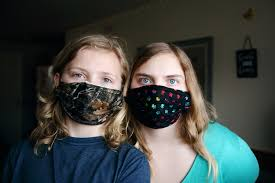

(183, 275, 3)


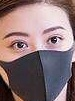

(101, 75, 3)


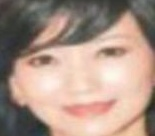

(136, 155, 3)


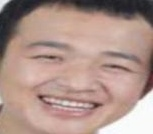

(134, 153, 3)


In [ ]:
#Displaying with mask image
img1=cv2.imread('/content/data/with_mask/with_mask_2613.jpg')
cv2_imshow(img1)
print(img1.shape)
img2=cv2.imread('/content/data/with_mask/with_mask_365.jpg')
cv2_imshow(img2)
print(img2.shape)
#Displaying without mask image
img3=cv2.imread('/content/data/without_mask/without_mask_3355.jpg')
cv2_imshow(img3)
print(img3.shape)
img4=cv2.imread('/content/data/without_mask/without_mask_3175.jpg')
cv2_imshow(img4)
print(img4.shape)


Image Preprocessing

In [ ]:

#[1] image resizing
#[2] convert the images to numpy array
data=[]
without_mask_path='/content/data/without_mask/'
for img_file in without_mask_files:
  image=cv2.imread(without_mask_path+img_file)
  image=cv2.resize(image,(128,128))
  gray_scale_image=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
  image=np.array(gray_scale_image)
  data.append(image)

with_mask_path='/content/data/with_mask/'
for img_file in with_mask_files:
  image=cv2.imread(with_mask_path+img_file)
  image=cv2.resize(image,(128,128))
  gray_scale_image=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
  image=np.array(gray_scale_image)
  data.append(image)
































In [ ]:
type(data)



list

In [ ]:
len(data)

7553

array([[255, 255, 253, ..., 255, 255, 255],
       [255, 253, 246, ..., 255, 255, 255],
       [255, 253, 253, ..., 255, 255, 255],
       ...,
       [255, 233, 232, ..., 245, 240, 252],
       [252, 231, 229, ..., 242, 249, 253],
       [252, 254, 255, ..., 254, 253, 255]], dtype=uint8)
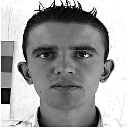

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128)

In [ ]:
#Converting labels list and data list to numpy arrays
X=np.array(data)
Y=np.array(labels)

In [ ]:
len(X)

7553

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)

(7553, 128, 128)


In [ ]:
len(Y)

7553

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(Y.shape)

(7553,)


In [ ]:
print(X)
print(Y)

[[[255 255 253 ... 255 255 255]
  [255 253 246 ... 255 255 255]
  [255 253 253 ... 255 255 255]
  ...
  [255 233 232 ... 245 240 252]
  [252 231 229 ... 242 249 253]
  [252 254 255 ... 254 253 255]]

 [[191 194 198 ... 238 238 238]
  [182 184 193 ... 238 238 238]
  [179 177 175 ... 238 238 238]
  ...
  [ 25  24  23 ...  50  50  50]
  [ 23  22  21 ...  52  51  48]
  [ 21  21  20 ...  53  52  50]]

 [[196 211 214 ... 216 213 197]
  [231 245 248 ... 251 247 232]
  [226 240 243 ... 245 242 226]
  ...
  [117  54  61 ... 155 160 151]
  [118  54  61 ... 117 124 116]
  [105  45  49 ...  75  80  79]]

 ...

 [[123 124 123 ... 153 154 155]
  [123 125 125 ... 157 157 159]
  [126 126 126 ... 160 160 160]
  ...
  [156 157 156 ...  83  81  80]
  [154 155 154 ...  84  81  80]
  [152 152 152 ...  82  81  80]]

 [[ 92  79  92 ...  88  91  87]
  [ 90  79  80 ...  86 101  84]
  [107  86  71 ...  77  67  82]
  ...
  [208 210 208 ... 217 219 220]
  [204 206 210 ... 217 218 218]
  [207 209 209 ... 216 218 2

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=10)

In [ ]:
print(X.shape, x_train.shape, x_test.shape)

(7553, 128, 128) (5287, 128, 128) (2266, 128, 128)


In [ ]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255


In [ ]:
#Building a Convolutional neural network(CNN)
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping



In [ ]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
call_back=EarlyStopping(monitor='loss',patience=3,verbose=0,mode='auto')

In [ ]:
# Training the neural network
history=model.fit(x_train_scaled, y_train,epochs=10,callbacks=call_back)

In [ ]:
# Model evaluation
model.evaluate(x_test_scaled,y_test)

71/71 [==============================] - 9s 128ms/step - loss: 0.4360 - accuracy: 0.9051


[0.4359554052352905, 0.9051191806793213]

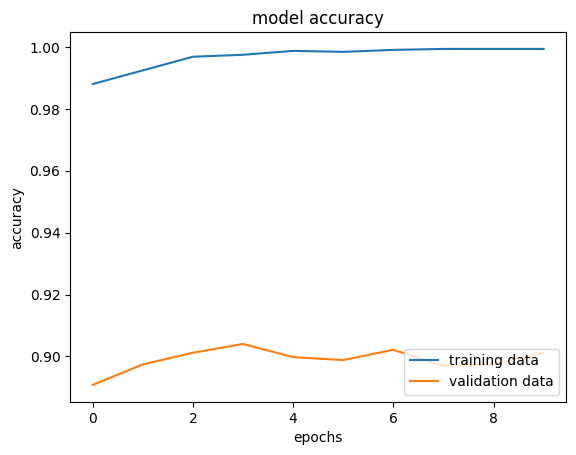

In [ ]:
#plotting loss and accuracy graphs
#1] Accuracy graph
#2] loss graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training data', 'validation data'], loc='lower right')

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training data', 'validation data'], loc='lower right')



In [ ]:
input_image_path=input('path of the image to be predicted: ')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
print(input_image.shape)
cv2.resize(input_image, (128,128))
input_image=input_image/255
reshape_image=np.reshape(input_image, [1,128,128,3])
input_pred=model.predict(reshape_image)
pred_label=np.argmax(input_pred)
if pred_label==1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')







In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
 # Set batch size
batch_size = 16

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data preparation for testing (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a generator for training data
train_generator = train_datagen.flow_from_directory(
    '/content/data/',  # Path to the data directory
    target_size=(128, 128),  # Resize images to 150x150
    batch_size=batch_size,
    class_mode='binary'       # Binary classification (with_mask vs without_mask)
)

# Create a generator for testing data (you can add a separate test directory if needed)
test_generator = test_datagen.flow_from_directory(
    '/content/data/',  # Path to the same data directory for testing
    target_size=(128, 128),  # Resize images to 150x150
    batch_size=batch_size,
    class_mode='binary',      # Binary classification
    shuffle=False              # Don't shuffle test data
)


Found 7553 images belonging to 2 classes.
Found 7553 images belonging to 2 classes.


In [ ]:
 # Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    epochs=10  # Adjust the number of epochs as needed
)



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [ ]:
model = ResNet50(weights='imagenet')

img_path = '/content/data/without_mask/without_mask_3175.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
preds = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
print('Predicted:',decode_predictions(preds,top=3)[0])

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted: [('n03814639', 'neck_brace', 0.38947043), ('n03630383', 'lab_coat', 0.13389796), ('n02669723', 'academic_gown', 0.06723188)]
